# Test Data Exploration and Submission Files Creation

This notebook will be used to take a look at how the model predicts on a small subset of the testing data available. We will also create the submission files to be sent to the moderators for evaluation. 

## Test Data Prediction Visualization

In [1]:
import os,glob,re,sys
sys.path.append('..')
import matplotlib.pyplot as plt

from src import data,prediction,unet

test_dir1 = "/home/ubuntu/testingdata/Test1Set"
test_dir2 = "/home/ubuntu/testingdata/Test2Set"
#test_dir1="/Users/aksharkumar/Documents/mlndCapstone/testingdata/Test1Set"
patient17_dir = os.path.join(test_dir1,"patient17")

num_imgs = 10

predictor_test_1 = prediction.Predictor(test_dir1,"weights-500Epochs-NoDrop.hdf5")
# predictor_test_2 = prediction.Predictor(test_dir2)

o_predictions,i_predictions = predictor_test_1.make_predictions_one(patient17_dir,num_imgs)

Using TensorFlow backend.


Endocardium Predictions (10 images)...
Epicardium Predictions (10 images)...


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


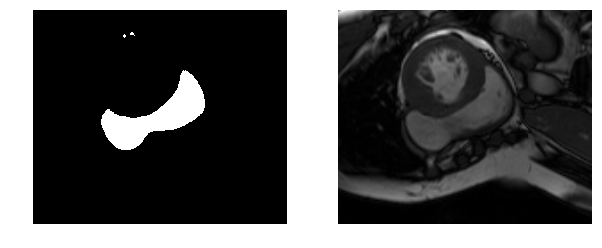

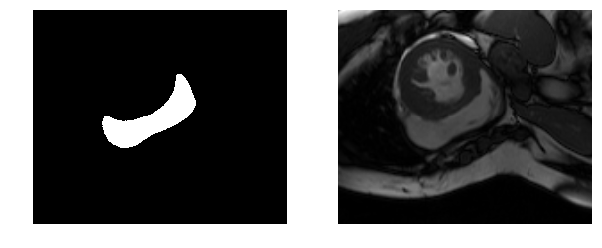

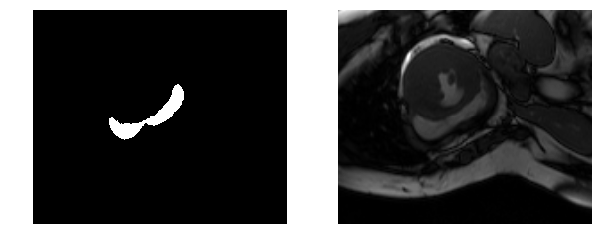

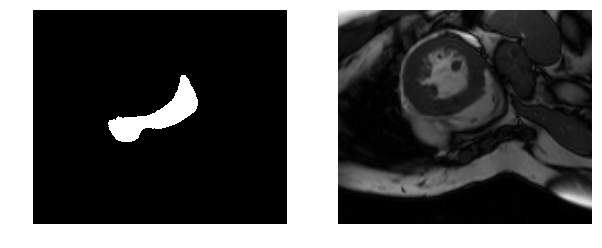

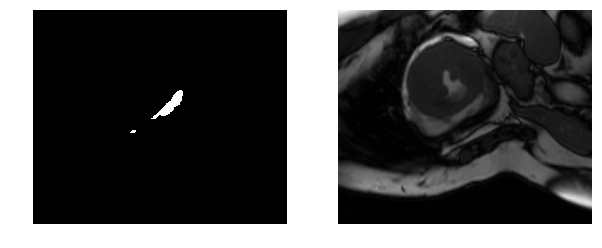

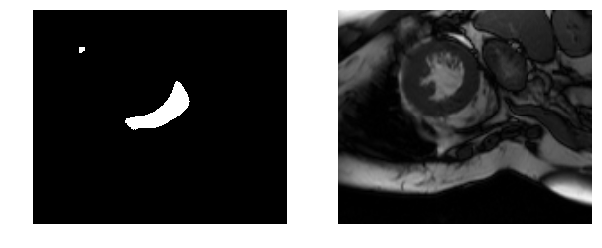

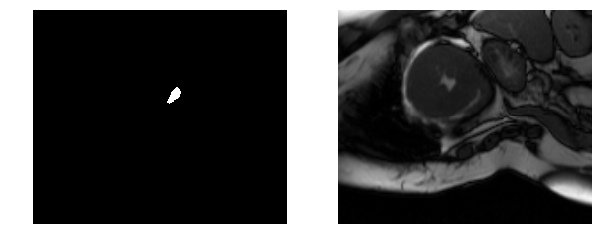

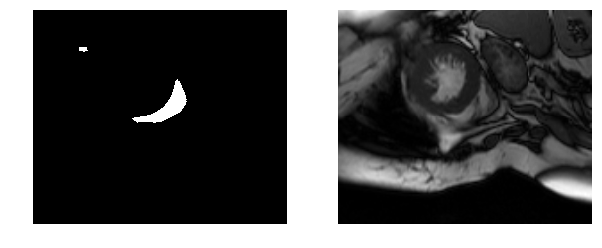

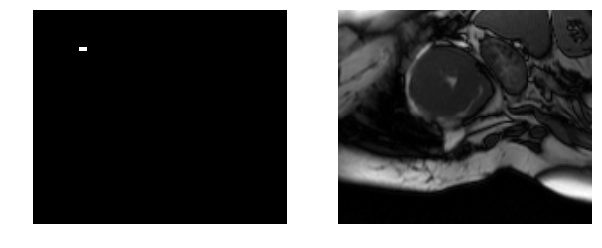

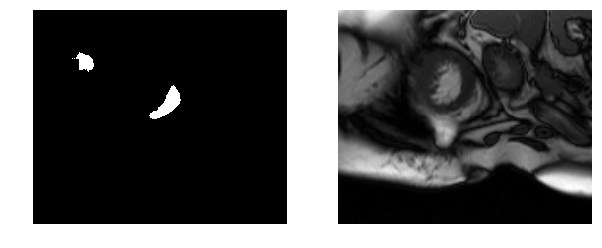

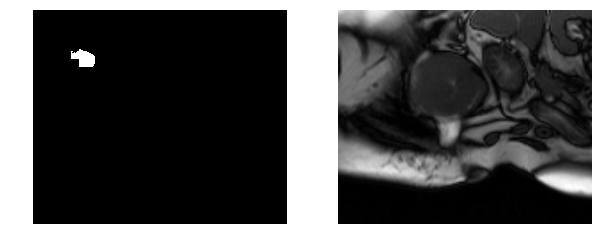

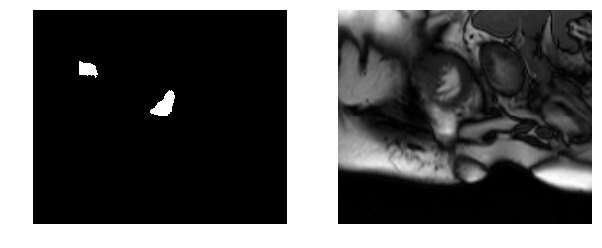

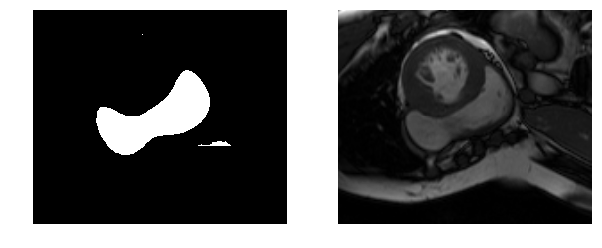

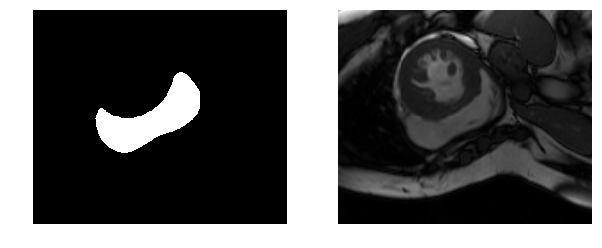

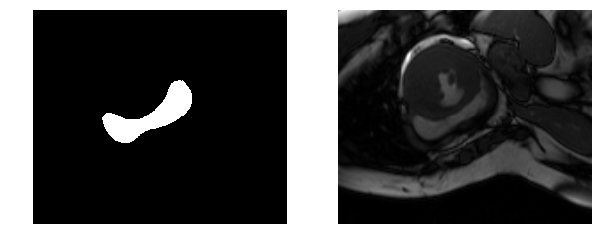

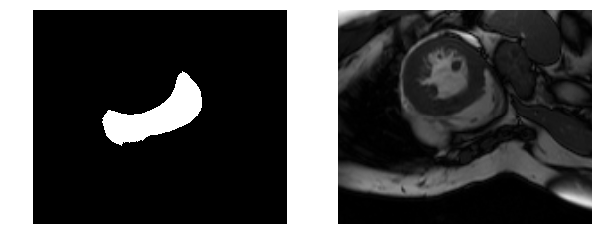

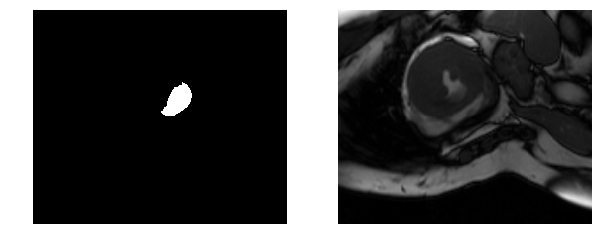

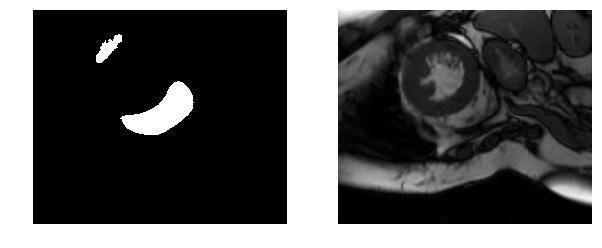

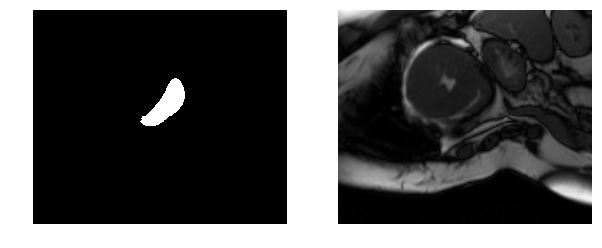

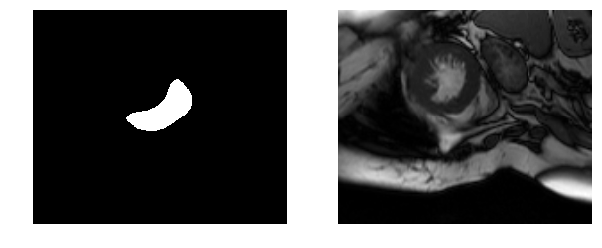

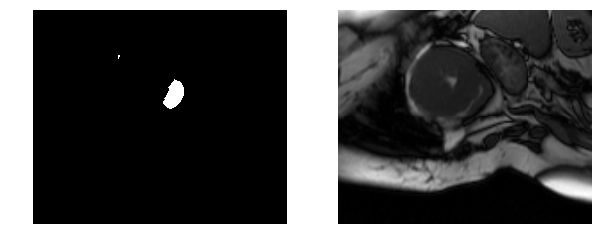

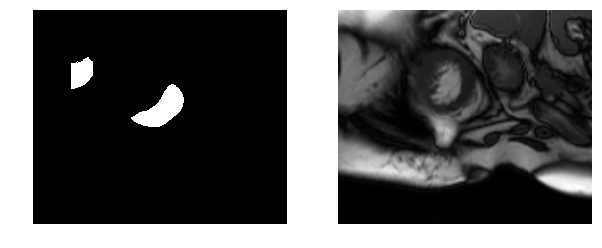

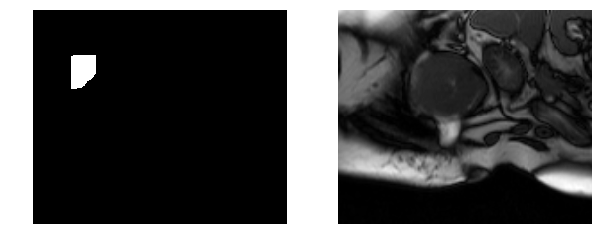

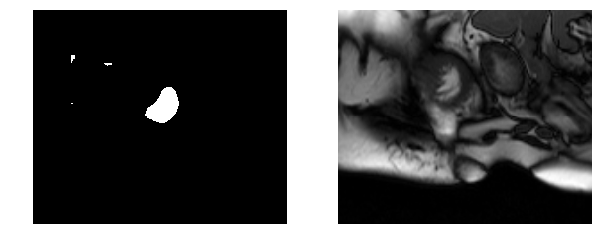

In [3]:
%matplotlib inline
import numpy as np
def show_segmentation_masks(predictions):
    for (image,mask) in predictions:
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1)
        plt.axis("off")
        #print(mask.shape)
        plt.imshow(np.where(mask[0,:,:,1]>0.5,255,0), cmap=plt.cm.gray)
        plt.subplot(1, 2, 2)
        plt.axis("off")
        plt.imshow(image, cmap=plt.cm.gray)

print("Endocardium Predictions ({} images)...".format(num_imgs))
show_segmentation_masks(i_predictions)
print("Epicardium Predictions ({} images)...".format(num_imgs))
show_segmentation_masks(o_predictions)

## Submission Files Creation

In [ ]:
out_dir = "/home/ubuntu/segmentationresults"
epi_preds,endo_preds = predictor_test_1.make_predictions(out_dir)

Prediction for Patient 17...
